In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import random_split
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import sys
import json
from tqdm import tqdm
from torch.utils.data import Subset

In [2]:



os.makedirs('/root/.kaggle/', exist_ok=True)
with open('/root/.kaggle/kaggle.json', 'w') as f:
    json.dump({
        "username": "bishramacharya",
        "key": ""
    }, f)

!chmod 600 /root/.kaggle/kaggle.json  


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [3]:
pip install wandb


Note: you may need to restart the kernel to use updated packages.


In [4]:
import wandb
wandb.login(key="")


wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [5]:
wandb.init(
    project="deepfake_lr_0.00001"
)

wandb: Currently logged in as: bishram (bishram-pulchowk-campus). Use `wandb login --relogin` to force relogin


In [6]:
!kaggle datasets download -d bishramacharya/augmented-dataset

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Dataset URL: https://www.kaggle.com/datasets/bishramacharya/augmented-dataset
License(s): unknown
100%|█████████████████████████████████████▉| 7.08G/7.08G [03:12<00:00, 39.9MB/s]
100%|██████████████████████████████████████| 7.08G/7.08G [03:12<00:00, 39.6MB/s]


In [7]:
os.makedirs('/kaggle/working/data')

In [8]:
import zipfile


with zipfile.ZipFile('augmented-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/kaggle/working/data')

In [9]:
import os

# Path to the file you want to delete
file_path = 'augmented-dataset.zip'

# Check if the file exists before attempting to remove it
if os.path.exists(file_path):
    os.remove(file_path)
    print(f"{file_path} has been deleted.")
else:
    print(f"{file_path} does not exist.")


augmented-dataset.zip has been deleted.


In [10]:
import kagglehub

# Download latest version
path = kagglehub.model_download("bishramacharya/freqnet/pyTorch/freqnet.py")

print("Path to model files:", path)

Path to model files: /kaggle/input/freqnet/pytorch/freqnet.py/1


In [11]:

# Add the directory containing freqnet.py to the Python path
sys.path.append("/kaggle/input/freqnet/pytorch/freqnet.py/1")
from freqnet import freqnet

In [12]:
path_to_drive = '/kaggle/working/data/'

In [13]:
!pip install torchviz

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4132 sha256=dfb732f4ef6a95623ad71aec73f29abf2b354f5bf9e897fecd9348d67826de61
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [14]:
data_dir = os.path.join(path_to_drive, '')  # Path to your dataset


In [15]:
# import os
# from PIL import Image
# import torchvision.transforms as transforms
# from tqdm import tqdm  # Import tqdm for progress bar
# import shutil  # Import shutil for zipping the directory

# # Define augmentation transformations
# def augmentations(image):
#     transform = transforms.Compose([
#         transforms.RandomHorizontalFlip(),
#         transforms.RandomRotation(10),
#         transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
#         transforms.ToTensor()
#     ])
#     return transform(image)

# # Save image function
# def save_image(image, path):
#     # Convert tensor to PIL image and save
#     image = transforms.ToPILImage()(image)
#     image.save(path)

# # Directories
# original_data_dir = '/kaggle/working/data'
# augmented_data_dir = '/kaggle/working/data_augmented'  # Define the augmented data directory
# classes = os.listdir(original_data_dir)

# # Augmentation process
# for class_name in classes:
#     class_dir = os.path.join(original_data_dir, class_name)
#     # Loop through subfolders (e.g., "Fake Copy", "Real Copy")
#     for subfolder in os.listdir(class_dir):
#         subfolder_path = os.path.join(class_dir, subfolder)
#         if os.path.isdir(subfolder_path):
#             augmented_class_dir = os.path.join(augmented_data_dir, class_name, subfolder)
#             os.makedirs(augmented_class_dir, exist_ok=True)
            
#             images = os.listdir(subfolder_path)
            
#             for img_name in tqdm(images, desc=f'Processing {subfolder} in {class_name}', unit='image'):
#                 img_path = os.path.join(subfolder_path, img_name)
#                 if img_name.endswith(('.png', '.jpg', '.jpeg')):  # Check for valid image extensions
#                     image = Image.open(img_path).convert('RGB')  # Ensure image is in RGB format
                    
#                     for i in range(3):  # Create 5 augmented images for each original image
#                         augmented_image = augmentations(image)
#                         augmented_img_name = f"{img_name.split('.')[0]}_aug_{i}.png"
#                         augmented_img_path = os.path.join(augmented_class_dir, augmented_img_name)
#                         save_image(augmented_image, augmented_img_path)

# print("Data augmentation complete.")

# # Zip the augmented dataset


In [16]:
# zip_filename = '/kaggle/working/augmented_dataset.zip'
# shutil.make_archive(zip_filename.replace('.zip', ''), 'zip', augmented_data_dir)

# print(f"Augmented dataset zipped to {zip_filename}")


In [17]:
# from IPython.display import FileLink

# # Generate a link to download the file
# FileLink(r'/kaggle/working/augmented_dataset.zip')


In [18]:
#Hyper-parameters
num_epochs = 10
batch_size = 16
learning_rate = 0.00001
num_classes = 2

In [19]:
#Model, loss and optimizer
model = freqnet(num_classes = num_classes)
model = model.cuda()
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate,weight_decay=1e-4)

In [20]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [21]:
import os
import shutil

# Define the path to the `.virtual_documents` folder
virtual_docs_folder = "/kaggle/working/.virtual_documents"

# Check if the folder exists and remove it
if os.path.exists(virtual_docs_folder):
    shutil.rmtree(virtual_docs_folder)  # This will remove the folder and all its contents
    print(f"Removed folder: {virtual_docs_folder}")
else:
    print(f"Folder not found: {virtual_docs_folder}")



Removed folder: /kaggle/working/.virtual_documents


In [22]:
augmented_data_dir='/kaggle/working/data/'

In [23]:
train_dataset = datasets.ImageFolder(augmented_data_dir, transform=transform)

In [24]:
#since Fake_1 comes before Real_0 alphabetically, Fake_1 is labelled as 0 and Real_0 as 1
print(train_dataset.class_to_idx)

{'Fake_1': 0, 'Real_0': 1}


In [25]:
len(train_dataset)

125613

In [26]:
dataset_size = len(train_dataset)
val_split = 0.3
val_size = int(dataset_size * val_split)
train_size = dataset_size - val_size

train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

In [27]:
train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True, num_workers = 2)
val_loader = DataLoader(val_dataset, batch_size = batch_size, shuffle = False, num_workers = 2)

In [28]:
from torchviz import make_dot

for i, (inputs, labels) in enumerate(train_loader):
  inputs, labels = inputs.cuda(), labels.cuda().float()
  yhat = model(inputs)
  break

make_dot(yhat, params=dict(list(model.named_parameters()))).render("rnn_torchviz", format="png")

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


'rnn_torchviz.png'

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


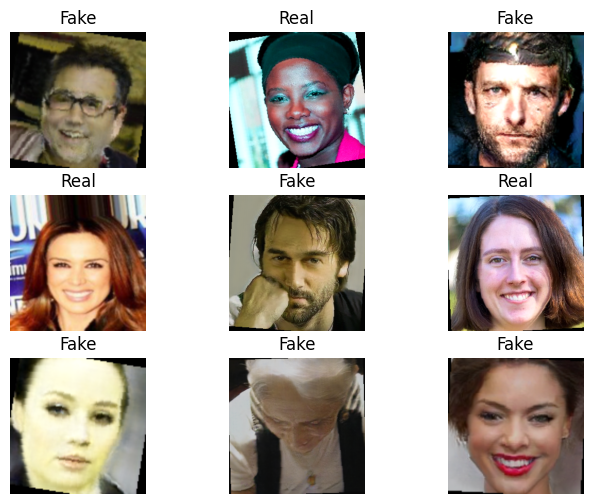

In [29]:
#Visualising some images from the dataset
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

def denormalize(img_tensor, mean, std):
    img_tensor = img_tensor.clone()  # cloning the tensor to avoid changing it
    for t, m, s in zip(img_tensor, mean, std):
        t.mul_(s).add_(m)  # Denormalize each channel
    return img_tensor

data_iter = iter(train_loader)
images, labels = next(data_iter)
images = torch.stack([denormalize(img, mean, std) for img in images])
images = images.numpy().transpose((0, 2, 3, 1))

fig, axes = plt.subplots(3, 3, figsize = (8, 6))
for i in range(3):
  for j in range(3):
    axes[i][j].imshow(images[i*3+j])
    lbl = labels[i*3+j].item()
    if lbl == 0:
      axes[i][j].set_title("Fake")
    else:
      axes[i][j].set_title("Real")
    axes[i][j].axis('off')
plt.show()

In [30]:
import torch.nn.init as init


def initialize_weights(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        init.xavier_uniform_(m.weight)
        if m.bias is not None:
            init.zeros_(m.bias)

In [31]:
model.apply(initialize_weights)

FreqNet(
  (realconv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (imagconv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (realconv2): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (imagconv2): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (realconv3): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (imagconv3): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (realconv4): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (imagconv4): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1),

In [32]:



checkpoint_dir = '/kaggle/working/'
log_dir = '/kaggle/working/'



def save_checkpoint(model, optimizer, epoch, checkpoint_dir, loss=None):
    if not os.path.exists(checkpoint_dir):
        os.makedirs(checkpoint_dir)
    checkpoint_path = os.path.join(checkpoint_dir, f'checkpoint_epoch_{epoch+1}.pth')

    checkpoint = {
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss
    }

    torch.save(checkpoint, checkpoint_path)
    # Log the checkpoint to W&B
    artifact = wandb.Artifact(f'checkpoint_epoch_{epoch+1}', type='model')
    artifact.add_file(checkpoint_path)
    wandb.log_artifact(artifact)
    
    
    print(f"Checkpoint saved at {checkpoint_path}")

def load_checkpoint(checkpoint_path, model, optimizer):
    if os.path.exists(checkpoint_path):
        checkpoint = torch.load(checkpoint_path)
        model.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        start_epoch = checkpoint['epoch'] + 1
        print(f"Resuming training from epoch {start_epoch}")
        return start_epoch
    else:
        print(f"No checkpoint found at {checkpoint_path}, starting from scratch.")
        return 0




In [33]:
train_writer = SummaryWriter(os.path.join(log_dir, 'train'))
val_writer = SummaryWriter(os.path.join(log_dir, 'val'))

In [34]:
def train_one_epoch(model, train_loader, criterion, optimizer, train_writer, epoch, num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    train_loader_tqdm = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', leave=False)

    for i, (inputs, labels) in enumerate(train_loader_tqdm):
        inputs, labels = inputs.cuda(), labels.cuda().float()

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels.unsqueeze(1))
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        predicted = (torch.sigmoid(outputs) > 0.5).float()
        correct += (predicted.squeeze() == labels).sum().item()
        total += labels.size(0)

        if (i+1) % 5 == 0:
            avg_loss = running_loss / 5
            train_loader_tqdm.set_postfix(loss=avg_loss)
            train_writer.add_scalar('loss', avg_loss, epoch * len(train_loader) + i)
            running_loss = 0.0

    avg_train_loss = running_loss / len(train_loader)
    train_accuracy = correct / total

    return avg_train_loss, train_accuracy

In [35]:
def validate_one_epoch(model, val_loader, criterion, val_writer, epoch, num_epochs):
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    val_loader_tqdm = tqdm(val_loader, desc=f'Validation {epoch+1}/{num_epochs}', leave=False)

    with torch.no_grad():
        for inputs, labels in val_loader_tqdm:
            inputs, labels = inputs.cuda(), labels.cuda().float()

            outputs = model(inputs).squeeze()
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct += (predicted.squeeze() == labels).sum().item()
            total += labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = correct / total

    return avg_val_loss, val_accuracy

In [ ]:


start_epoch = 0  # Start from 0 or load a checkpoint

train_writer = SummaryWriter(log_dir)
val_writer = SummaryWriter(log_dir)







# # Sample a subset of 10 samples from the dataset. Uncomment this when need to test the train process on 200 samples to check if everything works
# full_dataset = datasets.ImageFolder(data_dir, transform=transform)
# indices = torch.randperm(len(full_dataset)).tolist()[:200]  # Randomly sample 10 indices
# subset = Subset(full_dataset, indices)

# # Create smaller DataLoader for training and validation
# train_loader = DataLoader(subset, batch_size=batch_size, shuffle=True, num_workers=2)
# val_loader = DataLoader(subset, batch_size=batch_size, shuffle=False, num_workers=2)



import csv

# Lists to store metrics
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(start_epoch, num_epochs):

    # Train and get training loss and accuracy
    avg_train_loss, train_accuracy = train_one_epoch(model, train_loader, criterion, optimizer, train_writer, epoch, num_epochs)

    # Validate and get validation loss and accuracy
    try:
        avg_val_loss, val_accuracy = validate_one_epoch(model, val_loader, criterion, val_writer, epoch, num_epochs)
    except Exception as e:
        print(f"Error during validation: {e}")
        save_checkpoint(model, optimizer, epoch, checkpoint_dir, loss=avg_val_loss)
        break

    # Append metrics for this epoch
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)
    wandb.log({
        "epoch": epoch,
        "train_loss": avg_train_loss,
        "train_accuracy": train_accuracy,
        "val_loss": avg_val_loss,
        "val_accuracy": val_accuracy,
    })
    

    # Save checkpoint
    save_checkpoint(model, optimizer, epoch, checkpoint_dir)

# Save metrics to CSV after training
metrics = {
    "Epoch": list(range(1, num_epochs + 1)),
    "Train Loss": train_losses,
    "Train Accuracy": train_accuracies,
    "Val Loss": val_losses,
    "Val Accuracy": val_accuracies
}

csv_file = "training_metrics.csv"
with open(csv_file, mode='w') as f:
    writer = csv.DictWriter(f, fieldnames=metrics.keys())
    writer.writeheader()
    writer.writerows([dict(zip(metrics, t)) for t in zip(*metrics.values())])

print(f"Training metrics saved to {csv_file}")

print('Finished Training :)')


train_writer.close()
val_writer.close()
wandb.finish()



Checkpoint saved at /kaggle/working/checkpoint_epoch_1.pth


Checkpoint saved at /kaggle/working/checkpoint_epoch_2.pth


Epoch 3/10:  48%|████▊     | 2632/5496 [19:16<20:58,  2.28it/s, loss=0.533]